<a href="https://colab.research.google.com/github/maelleal/TCC_Recomendacao_INE/blob/main/TabularClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [399]:
!pip install -U fastai
import pandas as pd
import numpy as np
from fastai.tabular import *
import pathlib
from fastai.tabular.all import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [400]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [401]:
path = pathlib.Path('/content/drive/My Drive/TCC - Sistema recomendação INE')
df = pd.read_excel(path/'tabela_modelo_medias_v4.xlsx')
df = df.drop(columns=['ID_UFSC', 'MATRICULA', 'COD_AREA'])

df.head(n=4)

,CURSO,AREA,ORIENTADOR,CLASSIF_AREA,MEDIA_NOTA,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12,Area13
0,CIÊNCIAS DA COMPUTAÇÃO,Teoria da Computação e Linguagens,Jerusa Marchi,INE5430 - Inteligência Artificial,9.0,8.50,7.00,7.34,9.17,8.13,8.0,7.75,7.50,8.50,6.84,7.38,7.79,7.0
1,CIÊNCIAS DA COMPUTAÇÃO,"Engenharia de Software, Gerência de Projetos",Jean Carlo Rossa Hauck,INE5617 - Gerência de Projetos,10.0,7.75,6.50,8.00,7.17,7.67,8.5,7.34,8.00,9.63,7.50,8.63,7.09,8.0
2,SISTEMAS DE INFORMAÇÃO (noturno),"Engenharia de Software, Gerência de Projetos",Fabiane Barreto Vavassori Benitti,INE5614 - Engenharia de Software,8.5,9.00,7.40,6.60,8.50,8.00,7.5,7.25,8.63,8.10,7.67,6.50,7.50,0.0
3,SISTEMAS DE INFORMAÇÃO (noturno),Fundamentos de Programação,Fernando Augusto da Silva Cruz,INE5646 - Programação para Web,8.0,8.67,7.25,7.30,7.00,6.00,6.0,7.50,8.17,7.50,7.50,6.25,7.25,0.0


In [402]:
#The list of categorical features in the dataset
cat_names = ['CURSO', 'ORIENTADOR', 'AREA', 'CLASSIF_AREA'] 

#The list of continuous features in the dataset
#Exclude the Dependent variable 'Price'
cont_names =['MEDIA_NOTA', 'Area1', 'Area2', 'Area3', 'Area4', 'Area5', 'Area6', 'Area7', 'Area8', 'Area9', 'Area10', 'Area11', 'Area12', 'Area13'] 


In [403]:
cat = Categorify()

In [404]:
to = TabularPandas(df, cat, cat_names)

In [405]:
cats = to.procs.categorify

In [406]:
cats['AREA']

['#na#', 'Ciência, Tecnologia, Sociedade e Emprendedorismo', 'Engenharia de Software, Gerência de Projetos', 'Fundamentos Matemáticos', 'Fundamentos de Programação', 'Organização de Computadores e Sistemas Embarcados', 'Probabilidade e Estatística', 'Redes de Computadores e Segurança', 'Sistemas Operacionais, Concorrência e Paralelismo', 'Teoria da Computação e Linguagens', 'Tratamento e Banco de Dados']

In [407]:
#to.show(max_n=3)

In [408]:
#to.cats.head()

In [409]:
norm = Normalize()

In [410]:
to = TabularPandas(df, norm, cont_names=cont_names)

In [411]:
norms = to.procs.normalize

In [412]:
norms.means

{'MEDIA_NOTA': 8.4057665,
 'Area1': 8.082822,
 'Area2': 7.1061354,
 'Area3': 7.6442947,
 'Area4': 7.7555823,
 'Area5': 7.073834,
 'Area6': 7.5222692,
 'Area7': 7.570276,
 'Area8': 7.592239,
 'Area9': 8.081135,
 'Area10': 7.2294173,
 'Area11': 7.1889567,
 'Area12': 5.0856442,
 'Area13': 3.8745677}

In [413]:
norms.stds

{'MEDIA_NOTA': 1.977753,
 'Area1': 0.9639538,
 'Area2': 1.4871472,
 'Area3': 1.0417,
 'Area4': 0.9773903,
 'Area5': 1.0030686,
 'Area6': 1.2358096,
 'Area7': 1.3026177,
 'Area8': 1.336414,
 'Area9': 1.6202556,
 'Area10': 1.0844991,
 'Area11': 1.047839,
 'Area12': 3.499387,
 'Area13': 3.8373954}

In [414]:
to.conts.head()

,MEDIA_NOTA,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12,Area13
0,0.300459,0.432778,-0.071368,-0.292113,1.447137,1.052935,0.386573,0.137972,-0.069020,0.258518,-0.359076,0.182321,0.772808,0.814467
1,0.806083,-0.345267,-0.407583,0.341466,-0.599128,0.594342,0.791166,-0.176779,0.305116,0.955939,0.249500,1.375253,0.572773,1.075060
2,0.047647,0.951475,0.197603,-1.002491,0.761638,0.923333,-0.018020,-0.245871,0.776527,0.011644,0.406255,-0.657502,0.689937,-1.009687
3,-0.205165,0.609135,0.096739,-0.330512,-0.773061,-1.070549,-1.231799,-0.053950,0.432322,-0.358669,0.249500,-0.896089,0.618496,-1.009687
4,-0.710790,0.432778,-0.743797,-0.810497,0.383079,-0.073608,-0.422613,0.713735,-1.191426,0.196799,-0.672585,0.420908,0.689937,0.684170


In [415]:
fm = FillMissing(fill_strategy=FillStrategy.median)

In [416]:
to = TabularPandas(df, fm, cont_names=cont_names)

In [417]:
to.cat_names

(#1) ['Area13_na']

In [418]:
to.cats.head()

,Area13_na
0,False
1,False
2,False
3,False
4,False


In [419]:
splits = RandomSplitter()(range_of(df))
splits

((#261) [96,90,84,11,54,95,273,55,258,272...],
 (#65) [283,320,146,92,316,0,64,79,164,97...])

In [420]:
range_of(df)[:5], len(df)

([0, 1, 2, 3, 4], 326)

In [421]:
cat_names = ['CURSO', 'ORIENTADOR', 'CLASSIF_AREA'] 
cont_names = ['MEDIA_NOTA', 'Area1', 'Area2', 'Area3', 'Area4', 'Area5', 'Area6', 'Area7', 'Area8', 'Area9', 'Area10', 'Area11', 'Area12', 'Area13'] 
procs = [Categorify, FillMissing, Normalize]
y_names = 'AREA'
y_block = CategoryBlock()

In [422]:
to = TabularPandas(df, procs=procs, cat_names=cat_names, cont_names=cont_names,
                   y_names=y_names, y_block=y_block, splits=splits)

In [423]:
dls = to.dataloaders()

In [424]:
trn_dl = TabDataLoader(to.train, bs=64, shuffle=True, drop_last=True)
val_dl = TabDataLoader(to.valid, bs=128)

In [425]:
dls = DataLoaders(trn_dl, val_dl)

In [426]:
dls.show_batch()

,CURSO,ORIENTADOR,CLASSIF_AREA,Area13_na,MEDIA_NOTA,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12,Area13,AREA
0,CIÊNCIAS DA COMPUTAÇÃO,Carina Friedrich Dorneles,INE5647 - Qualidade da Informação,False,7.50,9.25,7.00,7.88,7.10,7.34,6.00,7.00,8.00,8.88,7.00,6.63,6.930000e+00,7.300000e+00,Tratamento e Banco de Dados
1,SISTEMAS DE INFORMAÇÃO (noturno),Elder Rizzon Santos,INE5633 - Sistemas Inteligentes,False,8.17,7.70,7.59,6.00,7.00,7.00,6.75,8.67,8.38,8.00,8.00,7.59,9.626842e-08,-1.797441e-07,Teoria da Computação e Linguagens
2,CIÊNCIAS DA COMPUTAÇÃO,Jean Carlo Rossa Hauck,INE5624 - Engenharia de Usabilidade,False,9.50,7.50,6.50,7.13,7.38,6.84,8.00,6.50,7.00,9.50,7.84,7.88,7.930000e+00,7.800000e+00,"Engenharia de Software, Gerência de Projetos"
3,SISTEMAS DE INFORMAÇÃO (noturno),Carina Friedrich Dorneles,"INE5650 - Web Semântica, Ontologias e Sistemas de Informação",False,9.00,9.25,7.50,7.90,8.00,6.50,6.50,7.00,9.00,8.10,7.67,6.75,8.170000e+00,-1.797441e-07,Tratamento e Banco de Dados
4,CIÊNCIAS DA COMPUTAÇÃO,Christiane Anneliese Gresse Von Wangenheim,INE5617 - Gerência de Projetos,False,9.50,7.75,6.00,7.34,7.38,6.00,8.00,6.50,6.75,9.40,7.34,7.38,6.700000e+00,7.750000e+00,"Engenharia de Software, Gerência de Projetos"
5,CIÊNCIAS DA COMPUTAÇÃO,Márcio Bastos Castro,INE5645 - Programação Paralela e Distribuída,False,9.50,9.50,9.50,9.00,8.34,7.34,9.50,7.75,8.75,9.80,9.00,9.13,8.250000e+00,8.840000e+00,"Sistemas Operacionais, Concorrência e Paralelismo"
6,SISTEMAS DE INFORMAÇÃO (noturno),Raul Sidnei Wazlawick,INE5670 - Desenvolvimento de Sistemas Móveis e Embarcados,False,8.00,6.63,6.84,6.00,6.50,6.00,7.25,9.75,7.63,7.67,7.90,6.90,9.626842e-08,-1.797441e-07,Fundamentos de Programação
7,CIÊNCIAS DA COMPUTAÇÃO,Raul Sidnei Wazlawick,INE5617 - Gerência de Projetos,False,9.50,9.25,7.50,7.00,7.70,7.17,8.00,6.25,6.75,8.25,8.60,8.25,7.430000e+00,7.840000e+00,"Engenharia de Software, Gerência de Projetos"
8,CIÊNCIAS DA COMPUTAÇÃO,Antonio Augusto Medeiros Frohlich,INE5437 - Arquitetura de Computadores II,False,10.00,9.00,8.50,9.30,8.75,8.17,10.00,8.50,9.00,10.00,8.50,8.63,8.000000e+00,8.600000e+00,Organização de Computadores e Sistemas Embarcados
9,SISTEMAS DE INFORMAÇÃO (noturno),José Eduardo de Lucca,INE5633 - Sistemas Inteligentes,False,7.25,6.90,7.00,6.50,6.50,6.00,7.00,6.00,6.50,7.17,6.63,7.00,9.626842e-08,-1.797441e-07,Teoria da Computação e Linguagens


In [427]:
to._dbunch_type == dls._dbunch_type

True

In [428]:
emb_szs = get_emb_sz(to); emb_szs

[(3, 3), (35, 12), (38, 12), (3, 3)]

In [429]:
to.cat_names

(#4) ['CURSO','ORIENTADOR','CLASSIF_AREA','Area13_na']

In [430]:
to['CURSO'].nunique()

2

In [431]:
cont_len = len(to.cont_names); cont_len

14

In [432]:
batch = dls.one_batch(); len(batch)

3

In [433]:
batch[0][0], batch[1][0]

(tensor([ 1,  6, 14,  1]),
 tensor([ 0.5557,  0.4497, -0.0909, -0.7482,  0.0397, -0.0709,  0.3828, -0.2375,
         -0.2306,  0.1231, -0.5424, -0.2193,  0.3828,  0.6778]))

In [434]:
net = TabularModel(emb_szs, cont_len, 2, [200,100])

In [435]:
net

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(35, 12)
    (2): Embedding(38, 12)
    (3): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(14, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=44, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=2, bias=True)
    )
  )
)

In [436]:
learn = tabular_learner(dls, [200,100], metrics=accuracy)

SuggestedLRs(valley=0.004365158267319202)

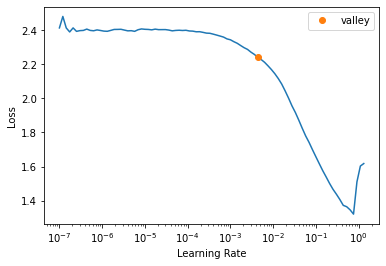

In [437]:
learn.lr_find()

In [438]:
learn.fit(20, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.378670,2.190800,0.261538,00:00
1,2.083795,2.089624,0.246154,00:00
2,1.787593,1.789544,0.538462,00:00
3,1.476068,1.237900,0.692308,00:00
4,1.214530,0.821782,0.784615,00:00
5,1.008717,0.623348,0.830769,00:00
6,0.850700,0.504715,0.846154,00:00
7,0.724188,0.458554,0.892308,00:00
8,0.623584,0.443068,0.907692,00:00
9,0.542623,0.405734,0.923077,00:00


In [439]:
dls = to.dataloaders()
learn = tabular_learner(dls, [200,100], metrics=accuracy)
learn.fit(50, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.477777,2.301578,0.200000,00:00
1,2.172713,2.157598,0.246154,00:00
2,1.915303,1.912711,0.430769,00:00
3,1.602928,1.292161,0.692308,00:00
4,1.314919,0.769731,0.830769,00:00
5,1.090570,0.540169,0.830769,00:00
6,0.916410,0.419286,0.876923,00:00
7,0.776122,0.341993,0.907692,00:00
8,0.664949,0.308764,0.907692,00:00
9,0.574853,0.308104,0.907692,00:00


In [440]:
row, cls, probs = learn.predict(df.iloc[0])

In [441]:
row.show()

,CURSO,ORIENTADOR,CLASSIF_AREA,Area13_na,MEDIA_NOTA,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12,Area13,AREA
0,CIÊNCIAS DA COMPUTAÇÃO,Jerusa Marchi,INE5430 - Inteligência Artificial,False,9.0,8.5,7.0,7.34,9.17,8.13,8.0,7.75,7.5,8.5,6.84,7.38,7.79,7.0,Teoria da Computação e Linguagens


In [442]:
dl = learn.dls.test_dl(df.iloc[:100])

In [443]:
dl.show_batch()

,CURSO,ORIENTADOR,CLASSIF_AREA,Area13_na,MEDIA_NOTA,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12,Area13,AREA
0,CIÊNCIAS DA COMPUTAÇÃO,Jerusa Marchi,INE5430 - Inteligência Artificial,False,9.0,8.50,7.00,7.34,9.17,8.13,8.0,7.75,7.50,8.50,6.84,7.38,7.79,7.000000e+00,Teoria da Computação e Linguagens
1,CIÊNCIAS DA COMPUTAÇÃO,Jean Carlo Rossa Hauck,INE5617 - Gerência de Projetos,False,10.0,7.75,6.50,8.00,7.17,7.67,8.5,7.34,8.00,9.63,7.50,8.63,7.09,8.000000e+00,"Engenharia de Software, Gerência de Projetos"
2,SISTEMAS DE INFORMAÇÃO (noturno),Fabiane Barreto Vavassori Benitti,INE5614 - Engenharia de Software,False,8.5,9.00,7.40,6.60,8.50,8.00,7.5,7.25,8.63,8.10,7.67,6.50,7.50,-1.797441e-07,"Engenharia de Software, Gerência de Projetos"
3,SISTEMAS DE INFORMAÇÃO (noturno),Fernando Augusto da Silva Cruz,INE5646 - Programação para Web,False,8.0,8.67,7.25,7.30,7.00,6.00,6.0,7.50,8.17,7.50,7.50,6.25,7.25,-1.797441e-07,Fundamentos de Programação
4,CIÊNCIAS DA COMPUTAÇÃO,Jean Everson Martina,INE5429 - Segurança em Computação,False,7.0,8.50,6.00,6.80,8.13,7.00,7.0,8.50,6.00,8.40,6.50,7.63,7.50,6.500000e+00,Redes de Computadores e Segurança
5,CIÊNCIAS DA COMPUTAÇÃO,Jean Everson Martina,INE5429 - Segurança em Computação,False,9.5,8.50,7.50,7.25,7.00,6.84,6.0,7.00,6.75,8.75,6.84,6.63,7.00,6.840000e+00,"Ciência, Tecnologia, Sociedade e Emprendedorismo"
6,CIÊNCIAS DA COMPUTAÇÃO,Jean Everson Martina,INE5429 - Segurança em Computação,False,9.0,8.75,8.50,7.88,7.84,8.00,8.0,7.25,6.75,9.00,7.00,7.63,7.90,7.670000e+00,Redes de Computadores e Segurança
7,CIÊNCIAS DA COMPUTAÇÃO,Raul Sidnei Wazlawick,INE5404 - Programação Orientada a Objetos II,False,9.5,7.75,6.00,7.13,8.13,7.50,6.5,7.25,7.25,8.13,7.00,7.38,7.40,7.670000e+00,Fundamentos de Programação
8,CIÊNCIAS DA COMPUTAÇÃO,Rafael Luiz Cancian,INE5416 - Paradigmas de Programação,False,9.5,9.00,6.00,8.17,9.34,7.34,9.0,7.34,7.00,9.13,7.84,7.75,7.42,7.630000e+00,Teoria da Computação e Linguagens
9,CIÊNCIAS DA COMPUTAÇÃO,Alexandre Goncalves Silva,INE5420 - Computação Gráfica,False,9.0,9.75,8.50,8.75,9.50,9.25,9.5,7.00,8.75,8.60,8.50,8.13,8.30,9.130000e+00,Fundamentos Matemáticos


In [444]:
learn.validate(dl=dl)

(#2) [0.04461591690778732,0.9800000190734863]

In [445]:
df2 = df.iloc[:100].drop('AREA', axis=1)
df2.head()

,CURSO,ORIENTADOR,CLASSIF_AREA,MEDIA_NOTA,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12,Area13
0,CIÊNCIAS DA COMPUTAÇÃO,Jerusa Marchi,INE5430 - Inteligência Artificial,9.0,8.50,7.00,7.34,9.17,8.13,8.0,7.75,7.50,8.50,6.84,7.38,7.79,7.0
1,CIÊNCIAS DA COMPUTAÇÃO,Jean Carlo Rossa Hauck,INE5617 - Gerência de Projetos,10.0,7.75,6.50,8.00,7.17,7.67,8.5,7.34,8.00,9.63,7.50,8.63,7.09,8.0
2,SISTEMAS DE INFORMAÇÃO (noturno),Fabiane Barreto Vavassori Benitti,INE5614 - Engenharia de Software,8.5,9.00,7.40,6.60,8.50,8.00,7.5,7.25,8.63,8.10,7.67,6.50,7.50,0.0
3,SISTEMAS DE INFORMAÇÃO (noturno),Fernando Augusto da Silva Cruz,INE5646 - Programação para Web,8.0,8.67,7.25,7.30,7.00,6.00,6.0,7.50,8.17,7.50,7.50,6.25,7.25,0.0
4,CIÊNCIAS DA COMPUTAÇÃO,Jean Everson Martina,INE5429 - Segurança em Computação,7.0,8.50,6.00,6.80,8.13,7.00,7.0,8.50,6.00,8.40,6.50,7.63,7.50,6.5


In [446]:
dl = learn.dls.test_dl(df2)
learn.validate(dl=dl)


(#2) [None,None]